# Roulettes Analysis

37 numbers

Betting Type:
1. Red & Black 1:1
2. Even & Odd 1:1
3. Big & Small 1:1
4. Dozen Bet 1:2
5. Column Bet 1:2

6. Straight Bet 1:35
7. Split Bet 1:17
8. Street Bet 1:11
9. Corner Bet 1:8
10. Sixline Bet 1:5

## My Questions: 
1. 哪一種下法期望值最高?
2. 下注幾次時單一下注方式勝算最高?
3. 有沒有可能藉由策略組合提高自己的勝率?

## 考慮幾個要因:
1. 數字的面積覆蓋率(覆蓋率即機率)
2. 這種數字鋪蓋狀況下的報酬跟損失

In [200]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 檢視各基本下注方式的獲勝機率:

In [201]:
sp = pd.Series({'RedBlack':18/37,
               'DozenBet':12/37,
               'StraightBet':1/37,
               'SplitBet':2/37,
               'StreetBet':3/37,
               'CornerBet':4/37,
               'SixlineBet':6/37})
print('The game of max winning probability:', sp[sp==sp.max()])
sp

The game of max winning probability: RedBlack    0.486486
dtype: float64


CornerBet      0.108108
DozenBet       0.324324
RedBlack       0.486486
SixlineBet     0.162162
SplitBet       0.054054
StraightBet    0.027027
StreetBet      0.081081
dtype: float64

### 檢視各基本下注方式的期望值:
* Bet: 下注基底
* Odds: 賠率
* WinningRate: 獲勝比率
* Expv: 單次下注的期望值

In [202]:
df = pd.DataFrame({'WinningRate':sp,
                  'Odds':[8,2,1,5,17,35,11],
                  'Bet':[1,5,5,1,1,1,1]})
df['Bet'] = df['Bet']*5
df['Expv'] = df['Bet']*df['Odds']*df['WinningRate']-df['Bet']*(1-df['WinningRate'])
df

,Bet,Odds,WinningRate,Expv
CornerBet,5,8,0.108108,-0.135135
DozenBet,25,2,0.324324,-0.675676
RedBlack,25,1,0.486486,-0.675676
SixlineBet,5,5,0.162162,-0.135135
SplitBet,5,17,0.054054,-0.135135
StraightBet,5,35,0.027027,-0.135135
StreetBet,5,11,0.081081,-0.135135


計算後由上表可見
1. 下注DozenBet與RedBlack的期望值最低
2. 其他下注方式的期望值大致相同

In [203]:
#計算連續贏的勝率
def WinningP(n,p):  
    WinP = binom(n,p)
    return WinP.pmf(n)

In [204]:
from math import factorial

In [205]:
#計算combination
def combination(a,b):
    value = factorial(a)/(factorial(b)*factorial(a-b))
    return value

In [206]:
#計算各種賭法的勝率分布
def PrintWinningTimes(n,wr,odds,bet,area):
    loserate = 0
    print('Total Play Times =',n)
    for i in range(n+1):
        p = combination(n,i)*pow(wr*area,i)*pow((1-wr*area),n-i)
        p = round(p,4)
        earn = bet*odds*(i)-bet*(area-1)*i-bet*area*(n-i)
        print('The P of winning',i,'times =',p,',Profit =',earn)
        if earn<=0:
            loserate += p
    print('Lose Rate =',loserate)

In [207]:
#計算玩到指定次數，指定下注方式的總計勝率多少
def WinRate(n,wr,odds,bet,area):
    allwinrate = []
    for r in range(n):
        loserate = 0
        r=r+1
        for i in range(r+1):
            p = combination(r,i)*pow(wr*area,i)*pow((1-wr*area),r-i)
            p = round(p,4)
            earn = bet*odds*(i)-bet*(area-1)*i-bet*area*(r-i)
            if earn<=0:
                loserate += p
        allwinrate.append(1-loserate)
    return allwinrate

In [208]:
PrintWinningTimes(10,df.loc['RedBlack','WinningRate'],df.loc['RedBlack','Odds'],df.loc['RedBlack','Bet'],1)

Total Play Times = 10
The P of winning 0 times = 0.0013 ,Profit = -250
The P of winning 1 times = 0.0121 ,Profit = -200
The P of winning 2 times = 0.0515 ,Profit = -150
The P of winning 3 times = 0.1301 ,Profit = -100
The P of winning 4 times = 0.2157 ,Profit = -50
The P of winning 5 times = 0.2452 ,Profit = 0
The P of winning 6 times = 0.1936 ,Profit = 50
The P of winning 7 times = 0.1048 ,Profit = 100
The P of winning 8 times = 0.0372 ,Profit = 150
The P of winning 9 times = 0.0078 ,Profit = 200
The P of winning 10 times = 0.0007 ,Profit = 250
Lose Rate = 0.6559


In [209]:
PrintWinningTimes(10,df.loc['DozenBet','WinningRate'],df.loc['DozenBet','Odds'],df.loc['DozenBet','Bet'],1)

Total Play Times = 10
The P of winning 0 times = 0.0198 ,Profit = -250
The P of winning 1 times = 0.0952 ,Profit = -175
The P of winning 2 times = 0.2056 ,Profit = -100
The P of winning 3 times = 0.2632 ,Profit = -25
The P of winning 4 times = 0.2211 ,Profit = 50
The P of winning 5 times = 0.1273 ,Profit = 125
The P of winning 6 times = 0.0509 ,Profit = 200
The P of winning 7 times = 0.014 ,Profit = 275
The P of winning 8 times = 0.0025 ,Profit = 350
The P of winning 9 times = 0.0003 ,Profit = 425
The P of winning 10 times = 0.0 ,Profit = 500
Lose Rate = 0.5838


In [210]:
WinRate(2,df.loc['DozenBet','WinningRate'],df.loc['DozenBet','Odds'],df.loc['DozenBet','Bet'],1)

[0.32430000000000003, 0.54349999999999998]

In [211]:
df.index

Index(['CornerBet', 'DozenBet', 'RedBlack', 'SixlineBet', 'SplitBet',
       'StraightBet', 'StreetBet'],
      dtype='object')

## 各基本下注方式對應下注次數，檢視其獲勝機率
勝率定義方式: 當有贏錢時其獲勝次數的發生機率總和

In [212]:
#計算各單一下注方式玩100次的獲勝分布
df_WinRate = pd.DataFrame(index=arange(1,101,1))
df_WinRate['CornerBet']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],1)
df_WinRate['DozenBet']=WinRate(100,df.loc['DozenBet','WinningRate'],df.loc['DozenBet','Odds'],df.loc['DozenBet','Bet'],1)
df_WinRate['RedBlack']=WinRate(100,df.loc['RedBlack','WinningRate'],df.loc['RedBlack','Odds'],df.loc['RedBlack','Bet'],1)
df_WinRate['SixlineBet']=WinRate(100,df.loc['SixlineBet','WinningRate'],df.loc['SixlineBet','Odds'],df.loc['SixlineBet','Bet'],1)
df_WinRate['SplitBet']=WinRate(100,df.loc['SplitBet','WinningRate'],df.loc['SplitBet','Odds'],df.loc['SplitBet','Bet'],1)
df_WinRate['StraightBet']=WinRate(100,df.loc['StraightBet','WinningRate'],df.loc['StraightBet','Odds'],df.loc['StraightBet','Bet'],1)
df_WinRate['StreetBet']=WinRate(100,df.loc['StreetBet','WinningRate'],df.loc['StreetBet','Odds'],df.loc['StreetBet','Bet'],1)

In [213]:
df_WinRate.describe()

,CornerBet,DozenBet,RedBlack,SixlineBet,SplitBet,StraightBet,StreetBet
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.429491,0.415474,0.393404,0.429136,0.419513,0.398944,0.426632
std,0.074354,0.046414,0.042093,0.061944,0.098333,0.125537,0.083872
min,0.108100,0.247300,0.236700,0.162200,0.054100,0.027000,0.081100
25%,0.387375,0.381050,0.364950,0.395700,0.369050,0.329150,0.381525
50%,0.436700,0.416350,0.382400,0.424100,0.426850,0.411700,0.432450
75%,0.481900,0.443900,0.423700,0.470975,0.487900,0.490200,0.486850
max,0.599600,0.543500,0.486500,0.587100,0.611200,0.616700,0.605500


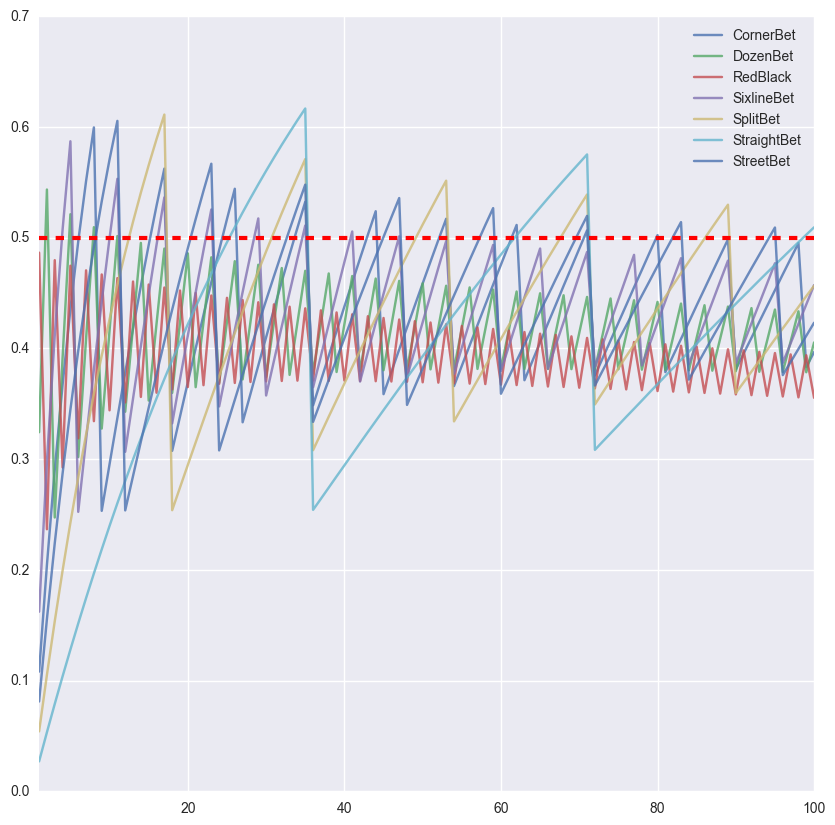

In [214]:
figsize(10,10)
df_WinRate.plot(alpha=0.8)
plt.plot(df_WinRate.index,[0.5]*len(df_WinRate),'r--',linewidth=3)

In [215]:
df_MaxRate = pd.DataFrame({'MaxPlayTimes':df_WinRate.idxmax(),
                         'MaxProbability':df_WinRate.max()})

df_MaxRate

,MaxPlayTimes,MaxProbability
CornerBet,8,0.5996
DozenBet,2,0.5435
RedBlack,1,0.4865
SixlineBet,5,0.5871
SplitBet,17,0.6112
StraightBet,35,0.6167
StreetBet,11,0.6055


In [216]:
dfWin05 = df_WinRate.loc[(df_WinRate.CornerBet>0.5)|
              (df_WinRate.DozenBet>0.5)|
              (df_WinRate.RedBlack>0.5)|
              (df_WinRate.SixlineBet>0.5)|
            (df_WinRate.SplitBet>0.5)|
            (df_WinRate.StraightBet>0.5)|
            (df_WinRate.StreetBet>0.5)]

In [217]:
dfWin05.describe()

,CornerBet,DozenBet,RedBlack,SixlineBet,SplitBet,StraightBet,StreetBet
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.442879,0.429403,0.397803,0.452776,0.452979,0.421660,0.446460
std,0.075282,0.044032,0.046079,0.054408,0.093292,0.133654,0.081873
min,0.204500,0.327600,0.236700,0.298000,0.105200,0.053300,0.155600
25%,0.397275,0.406200,0.366825,0.423475,0.413000,0.346750,0.404325
50%,0.456500,0.423300,0.399650,0.454050,0.457350,0.435300,0.447250
75%,0.498350,0.458250,0.434850,0.488225,0.518850,0.526175,0.508750
max,0.599600,0.543500,0.474700,0.587100,0.611200,0.616700,0.605500


In [218]:
def highlight05(s):
    greater05 = s>0.5
    return ['background-color: yellow' if v else '' for v in greater05]

In [219]:
dfWin05.style.apply(highlight05)

,CornerBet,DozenBet,RedBlack,SixlineBet,SplitBet,StraightBet,StreetBet
2,0.2045,0.5435,0.2367,0.298,0.1052,0.0533,0.1556
4,0.3672,0.3914,0.2925,0.5072,0.1993,0.1038,0.287
5,0.4356,0.5212,0.4747,0.5871,0.2426,0.128,0.3448
7,0.5511,0.4086,0.4705,0.3175,0.3223,0.1745,0.4467
8,0.5996,0.5095,0.3343,0.3812,0.3589,0.1968,0.4916
9,0.2533,0.3276,0.4668,0.4422,0.3935,0.2185,0.5328
10,0.2954,0.4162,0.3441,0.4996,0.4263,0.2397,0.5707
11,0.3371,0.5015,0.4635,0.5532,0.4573,0.2602,0.6055
13,0.4179,0.4201,0.4604,0.3547,0.5144,0.2997,0.2848
14,0.4565,0.4953,0.3562,0.4021,0.5407,0.3186,0.3158


## 檢視組合型的下注策略:
1. 單次單一下注方式下注複數區域
2. 單次兩種下注組合的下注方式
3. 單次三種下注組合的下注方式

### 單次單一下注複數區域
#### CornerBet 1:8

單一下注勝率 4/37，

下注下到8個區域只買到32個數字

最多可切6個區

只考慮下注1~6個區域的狀況

In [220]:
df_CornerBet = pd.DataFrame(index=arange(100)+1)

In [221]:
df_CornerBet['CornerBet1']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],1)
df_CornerBet['CornerBet2']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],2)
df_CornerBet['CornerBet3']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],3)
df_CornerBet['CornerBet4']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],4)
df_CornerBet['CornerBet5']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],5)
df_CornerBet['CornerBet6']=WinRate(100,df.loc['CornerBet','WinningRate'],df.loc['CornerBet','Odds'],df.loc['CornerBet','Bet'],6)

In [265]:
df_CornerBet[df_CornerBet == df_CornerBet.max()].dropna(how='all').style.apply(highlight05)

,CornerBet1,CornerBet2,CornerBet3,CornerBet4,CornerBet5,CornerBet6
1,nan,nan,nan,nan,nan,0.6486
2,nan,nan,0.5435,0.6779,nan,nan
4,nan,0.6226,nan,nan,nan,nan
7,nan,nan,nan,nan,0.5882,nan
8,0.5996,nan,nan,nan,nan,nan


In [224]:
df_CornerBet = df_CornerBet[df_CornerBet>0.5]
df_CornerBet.dropna(how='all').style.apply(highlight05)

,CornerBet1,CornerBet2,CornerBet3,CornerBet4,CornerBet5,CornerBet6
1,nan,nan,nan,nan,0.5405,0.6486
2,nan,nan,0.5435,0.6779,nan,nan
3,nan,0.5185,nan,nan,0.5607,nan
4,nan,0.6226,nan,0.5799,nan,0.5607
5,nan,nan,0.5212,nan,0.5757,nan
6,nan,nan,nan,0.5227,nan,nan
7,0.5511,nan,nan,nan,0.5882,0.5292
8,0.5996,0.5433,0.5095,nan,nan,nan
10,nan,nan,nan,nan,nan,0.5103
11,nan,nan,0.5015,0.556,nan,nan


#### DozenBet
最多下注到2個區域

In [225]:
df_DozenBet = pd.DataFrame(index=arange(100)+1)
df_DozenBet['DozenBet1']=WinRate(100,df.loc['DozenBet','WinningRate'],df.loc['DozenBet','Odds'],df.loc['DozenBet','Bet'],1)
df_DozenBet['DozenBet2']=WinRate(100,df.loc['DozenBet','WinningRate'],df.loc['DozenBet','Odds'],df.loc['DozenBet','Bet'],2)

In [266]:
df_DozenBet[df_DozenBet == df_DozenBet.max()].dropna(how='all').style.apply(highlight05)

,DozenBet1,DozenBet2
1,nan,0.6486
2,0.5435,nan


#### RedBlack
不考慮

#### SixlineBet 1:5
考慮下1~4個區域的狀況

In [228]:
df_SixlineBet = pd.DataFrame(index=arange(100)+1)
df_SixlineBet['SixlineBet1']=WinRate(100,df.loc['SixlineBet','WinningRate'],df.loc['SixlineBet','Odds'],df.loc['SixlineBet','Bet'],1)
df_SixlineBet['SixlineBet2']=WinRate(100,df.loc['SixlineBet','WinningRate'],df.loc['SixlineBet','Odds'],df.loc['SixlineBet','Bet'],2)

In [267]:
df_SixlineBet[df_SixlineBet == df_SixlineBet.max()].dropna(how='all').style.apply(highlight05)

,SixlineBet1,SixlineBet2
2,nan,0.5435
5,0.5871,nan


#### Split Bet 1:17
考慮1~16個area的狀況

In [231]:
col = []
for i in range(16):
    col.append('SplitBet'+str(i+1))
df_split = pd.DataFrame(index=arange(100)+1)
for i,k in zip(col,range(16)):
    df_split[i] = WinRate(100,df.loc['SplitBet','WinningRate'],df.loc['SplitBet','Odds'],df.loc['SplitBet','Bet'],k+1)

In [232]:
df_split.head()

,SplitBet1,SplitBet2,SplitBet3,SplitBet4,SplitBet5,SplitBet6,SplitBet7,SplitBet8,SplitBet9,SplitBet10,SplitBet11,SplitBet12,SplitBet13,SplitBet14,SplitBet15,SplitBet16
1,0.0541,0.1081,0.1622,0.2162,0.2703,0.3243,0.3784,0.4324,0.4865,0.5405,0.5946,0.6486,0.7027,0.7568,0.8108,0.8649
2,0.1052,0.2045,0.2980,0.3857,0.4675,0.5435,0.6136,0.6779,0.2367,0.2922,0.3535,0.4208,0.4938,0.5726,0.6574,0.7480
3,0.1536,0.2905,0.4119,0.5185,0.6114,0.2473,0.3212,0.3993,0.4797,0.5607,0.6402,0.2729,0.3470,0.4334,0.5330,0.6469
4,0.1993,0.3672,0.5072,0.6226,0.2963,0.3914,0.4871,0.5799,0.2925,0.3756,0.4659,0.5607,0.6564,0.3279,0.4321,0.5595
5,0.2426,0.4356,0.5871,0.2962,0.4099,0.5212,0.6247,0.3748,0.4747,0.5757,0.3276,0.4258,0.5338,0.6471,0.3505,0.4840


In [268]:
df_split[df_split == df_split.max()].dropna(how='all').style.apply(highlight05)

,SplitBet1,SplitBet2,SplitBet3,SplitBet4,SplitBet5,SplitBet6,SplitBet7,SplitBet8,SplitBet9,SplitBet10,SplitBet11,SplitBet12,SplitBet13,SplitBet14,SplitBet15,SplitBet16
1,nan,nan,nan,nan,nan,nan,nan,nan,0.4865,nan,nan,0.6486,0.7027,0.7568,0.8108,0.8649
2,nan,nan,nan,nan,nan,0.5435,nan,0.6779,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,0.6114,nan,nan,nan,nan,nan,0.6402,nan,nan,nan,nan,nan
4,nan,nan,nan,0.6226,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,0.5871,nan,nan,nan,0.6247,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.5882,nan,nan,nan,nan,nan,nan
8,nan,0.5996,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
17,0.6112,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### StraightBet 1:35
考慮下注1~34個area的狀況

In [235]:
col2 = []
for i in range(34):
    col2.append('StraightBet'+str(i+1))
df_StraightBet = pd.DataFrame(index=arange(100)+1)
for i,k in zip(col2,range(34)):
    df_StraightBet[i] = WinRate(100,df.loc['StraightBet','WinningRate'],df.loc['StraightBet','Odds'],df.loc['StraightBet','Bet'],k+1)

In [273]:
df_StraightBet[df_StraightBet == df_StraightBet.max()].dropna(how='all').T.style.apply(highlight05)

,1,2,3,4,5,7,8,11,17,35
StraightBet1,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.6167
StraightBet2,nan,nan,nan,nan,nan,nan,nan,nan,0.6112,nan
StraightBet3,nan,nan,nan,nan,nan,nan,nan,0.6055,nan,nan
StraightBet4,nan,nan,nan,nan,nan,nan,0.5996,nan,nan,nan
StraightBet5,nan,nan,nan,nan,nan,0.6381,nan,nan,nan,nan
StraightBet6,nan,nan,nan,nan,0.5871,nan,nan,nan,nan,nan
StraightBet7,nan,nan,nan,nan,0.6496,nan,nan,nan,nan,nan
StraightBet8,nan,nan,nan,0.6226,nan,nan,nan,nan,nan,nan
StraightBet9,nan,nan,0.5666,nan,nan,nan,nan,nan,nan,nan
StraightBet10,nan,nan,0.6114,nan,nan,nan,nan,nan,nan,nan


#### StreetBet 1:11
考慮下注1 - 10個area的狀況

In [238]:
col3 = []
for i in range(10):
    col3.append('StreetBet'+str(i+1))
df_StreetBet = pd.DataFrame(index=arange(100)+1)
for i,k in zip(col3,range(10)):
    df_StreetBet[i] = WinRate(100,df.loc['StreetBet','WinningRate'],df.loc['StreetBet','Odds'],df.loc['StreetBet','Bet'],k+1)

In [275]:
df_StreetBet[df_StreetBet == df_StreetBet.max()].dropna(how='all').style.apply(highlight05)

,StreetBet1,StreetBet2,StreetBet3,StreetBet4,StreetBet5,StreetBet6,StreetBet7,StreetBet8,StreetBet9,StreetBet10
1,nan,nan,nan,nan,nan,0.4865,nan,0.6486,0.7297,0.8108
2,nan,nan,nan,0.5435,0.6465,nan,nan,nan,nan,nan
3,nan,nan,0.5666,nan,nan,nan,nan,nan,nan,nan
5,nan,0.5871,nan,nan,nan,nan,0.6252,nan,nan,nan
11,0.6055,nan,nan,nan,nan,nan,nan,nan,nan,nan


## 再來考慮兩種組合的策略

In [241]:
from itertools import combinations

In [242]:
df.index

Index(['CornerBet', 'DozenBet', 'RedBlack', 'SixlineBet', 'SplitBet',
       'StraightBet', 'StreetBet'],
      dtype='object')

In [243]:
x = combinations(df.index,2)

for i in x:
    print(i)

('CornerBet', 'DozenBet')
('CornerBet', 'RedBlack')
('CornerBet', 'SixlineBet')
('CornerBet', 'SplitBet')
('CornerBet', 'StraightBet')
('CornerBet', 'StreetBet')
('DozenBet', 'RedBlack')
('DozenBet', 'SixlineBet')
('DozenBet', 'SplitBet')
('DozenBet', 'StraightBet')
('DozenBet', 'StreetBet')
('RedBlack', 'SixlineBet')
('RedBlack', 'SplitBet')
('RedBlack', 'StraightBet')
('RedBlack', 'StreetBet')
('SixlineBet', 'SplitBet')
('SixlineBet', 'StraightBet')
('SixlineBet', 'StreetBet')
('SplitBet', 'StraightBet')
('SplitBet', 'StreetBet')
('StraightBet', 'StreetBet')


('CornerBet', 'DozenBet'): 最多考慮2C1D的狀況  
('CornerBet', 'RedBlack'): 有重疊鋪蓋不考慮  
('CornerBet', 'SixlineBet'): 12列可分6大塊: 1+1, 1+2, 1+3, 1+4, 2+1,2+2, 2+3, 3+1, 3+2  
('CornerBet', 'SplitBet'):  x, 組合Odds較低  
('CornerBet', 'StraightBet'):x, 組合的Odds較低  
('CornerBet', 'StreetBet'):same as dozenbet  
('DozenBet', 'RedBlack'):x, 有重疊鋪蓋  
('DozenBet', 'SixlineBet'): x, 重疊鋪蓋  
('DozenBet', 'SplitBet'):x, 賠率較低  
('DozenBet', 'StraightBet'):x, 賠率較低  
('DozenBet', 'StreetBet'): x, 重疊鋪蓋  
('RedBlack', 'SixlineBet'):x, 重疊鋪蓋  
('RedBlack', 'SplitBet'):x, 重疊鋪蓋  
('RedBlack', 'StraightBet'): 賠率較低  
('RedBlack', 'StreetBet'):x, 重疊鋪蓋  
('SixlineBet', 'SplitBet'):x, Odds較低  
('SixlineBet', 'StraightBet'): x, Odds較低  
('SixlineBet', 'StreetBet'):x, 重疊鋪蓋  
('SplitBet', 'StraightBet'):x, Odds較低  
('SplitBet', 'StreetBet'):x, Odds較低  
('StraightBet', 'StreetBet')x: Odds 較低  

綜合以上  
只考慮('CornerBet', 'DozenBet'), ('CornerBet', 'SixlineBet')的狀況

In [244]:
#('CornerBet', 'DozenBet')
def playcombCD(times,CorArea):
    apsum = 0
    for t in range(times+1):
        winearn = 0
        print('Win',t,'times.')
        p = combination(times,t)*pow(((12/37)+((4*CorArea)/37)),t)*pow(((37-12-(4*CorArea))/37),times-t)
        print('p =',p)
        for a in range(t+1):
            sume = 0
            b = t-a
            wina = 12/(12+4*CorArea)
            winb = (4/(12+4*CorArea))*CorArea
            ap = p*combination(t,a)*pow(wina,a)*pow(winb,b)
            winearn = 50*a+40*b+(-25)*b+(-5)*a+(-5)*(CorArea-1)*b
            sume = winearn + ((-25)+((-5)*CorArea))*(times-t)
            if sume > 0:
                apsum += ap
            print('win a =',a,'times,','win b =',b,'times.','winearn =',winearn,',ap=',round(ap,4))
            print('sume =',sume)
        print('\n')

In [245]:
#('CornerBet', 'DozenBet')
def combCDBet(playtimes,CorArea):
    lst = []
    for play in range(playtimes):
        apsum = 0
        for t in range(play+1):
            winearn = 0
            p = combination(play,t)*pow(((12/37)+((4*CorArea)/37)),t)*pow(((37-12-(4*CorArea))/37),play-t)
            for a in range(t+1):
                sume = 0
                b = t-a
                wina = 12/(12+4*CorArea)
                winb = (4/(12+4*CorArea))*CorArea
                ap = p*combination(t,a)*pow(wina,a)*pow(winb,b)
                winearn = 50*a+40*b+(-25)*b+(-5)*a+(-5)*(CorArea-1)*b
                sume = winearn + (-25+((-5)*CorArea))*(play-t)
                if sume > 0:
                    apsum += ap
        lst.append(apsum)
    return lst

In [246]:
CD1 = combCDBet(100,1)
CD2 = combCDBet(100,2)

In [247]:
print('CD1 max winning rate =',max(CD1),',times =', CD1.index(max(CD1))+1)
print('CD2 max winning rate =',max(CD2),',times =', CD2.index(max(CD2))+1)

CD1 max winning rate = 0.5551497443389335 ,times = 3
CD2 max winning rate = 0.5902118334550768 ,times = 3


In [248]:
playcombCD(3,2)

Win 0 times.
p = 0.09699326792095238
win a = 0 times, win b = 0 times. winearn = 0 ,ap= 0.097
sume = -105


Win 1 times.
p = 0.342329180897479
win a = 0 times, win b = 1 times. winearn = 10 ,ap= 0.1369
sume = -60
win a = 1 times, win b = 0 times. winearn = 45 ,ap= 0.2054
sume = -25


Win 2 times.
p = 0.4027402128205635
win a = 0 times, win b = 2 times. winearn = 20 ,ap= 0.0644
sume = -15
win a = 1 times, win b = 1 times. winearn = 55 ,ap= 0.1933
sume = 20
win a = 2 times, win b = 0 times. winearn = 90 ,ap= 0.145
sume = 55


Win 3 times.
p = 0.1579373383610053
win a = 0 times, win b = 3 times. winearn = 30 ,ap= 0.0101
sume = 30
win a = 1 times, win b = 2 times. winearn = 65 ,ap= 0.0455
sume = 65
win a = 2 times, win b = 1 times. winearn = 100 ,ap= 0.0682
sume = 100
win a = 3 times, win b = 0 times. winearn = 135 ,ap= 0.0341
sume = 135




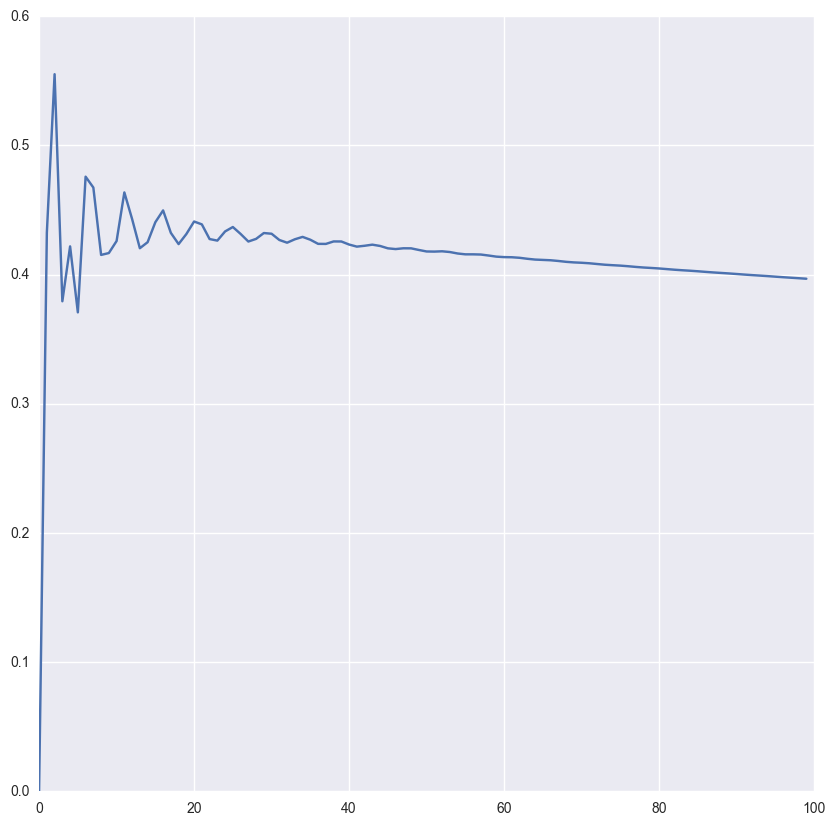

In [249]:
plt.plot(CD1)

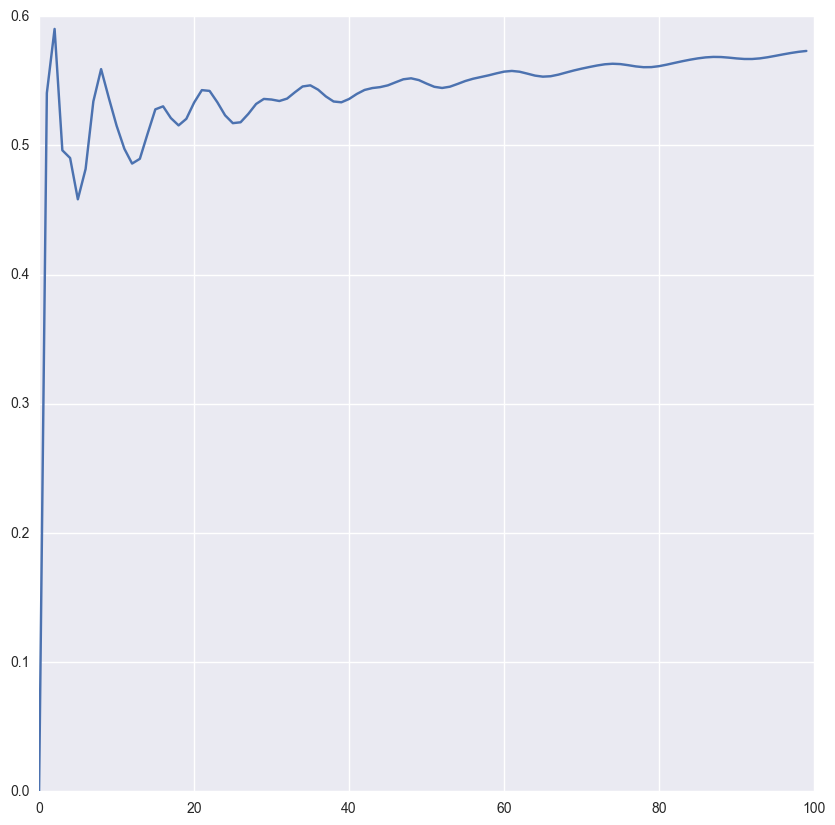

In [250]:
plt.plot(CD2)

('CornerBet', 'SixlineBet'): 12列可分6大塊: 1+1, 1+2, 1+3, 1+4, 2+1,2+2, 2+3, 3+1, 3+2

In [251]:
#('CornerBet', 'SixlineBet')
def playcombCS(times,CorArea,SixArea):
    apsum = 0
    for t in range(times+1):
        winearn = 0
        print('Win',t,'times.')
        p = combination(times,t)*pow((((6*SixArea)/37)+((4*CorArea)/37)),t)*pow(((37-(6*SixArea)-(4*CorArea))/37),times-t)
        print('p =',p)
        for a in range(t+1):
            sume = 0
            b = t-a
            wina = (6*SixArea)/((6*SixArea)+4*CorArea)
            winb = (4/((6*SixArea)+4*CorArea))*CorArea
            ap = p*combination(t,a)*pow(wina,a)*pow(winb,b)
            winearn = 25*a+40*b+(-5)*b+(-5)*a+(-5)*(CorArea-1)*b+(-5)*(SixArea-1)*a
            sume = winearn + (((-5)*SixArea)+((-5)*CorArea))*(times-t)
            if sume > 0:
                apsum += ap
            print('win Six =',a,'times,','win Corner =',b,'times.','winearn =',winearn,',ap=',round(ap,4))
            print('sume =',sume)
        print('\n')

In [252]:
#('CornerBet', 'SixlineBet')
def combCSet(playtimes,CorArea,SixArea):
    lst = []
    for play in range(playtimes):
        apsum = 0
        for t in range(play+1):
            winearn = 0
            p = combination(play,t)*pow((((6*SixArea)/37)+((4*CorArea)/37)),t)*pow(((37-(6*SixArea)-(4*CorArea))/37),play-t)
            for a in range(t+1):
                sume = 0
                b = t-a
                wina = (6*SixArea)/((6*SixArea)+4*CorArea)
                winb = (4/((6*SixArea)+4*CorArea))*CorArea
                ap = p*combination(t,a)*pow(wina,a)*pow(winb,b)
                winearn = 25*a+40*b+(-5)*b+(-5)*a+(-5)*(CorArea-1)*b+(-5)*(SixArea-1)*a
                sume = winearn + (((-5)*SixArea)+((-5)*CorArea))*(play-t)
                if sume > 0:
                    apsum += ap
        lst.append(apsum)
    return lst

## 考慮CornerBet 與 SixLine的組合

In [253]:
combCS =[[1,1],[1,2],[1,3],[1,4],[2,1],[2,2],[2,3],[3,1],[3,2]]
dfCS = pd.DataFrame(index=arange(100)+1)
for C,S in combCS:
    dfCS['C'+str(C)+'S'+str(S)] = combCSet(100,C,S)

In [278]:
dfCS[dfCS == dfCS.max()].dropna(how='all').style.apply(highlight05)

,C1S1,C1S2,C1S3,C1S4,C2S1,C2S2,C2S3,C3S1,C3S2
2,nan,nan,nan,0.756757,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,0.613587,nan,nan,nan,nan
8,0.48987,nan,nan,nan,nan,nan,nan,nan,nan
100,nan,0.525292,0.608651,nan,nan,0.842544,0.970465,0.686513,0.97035


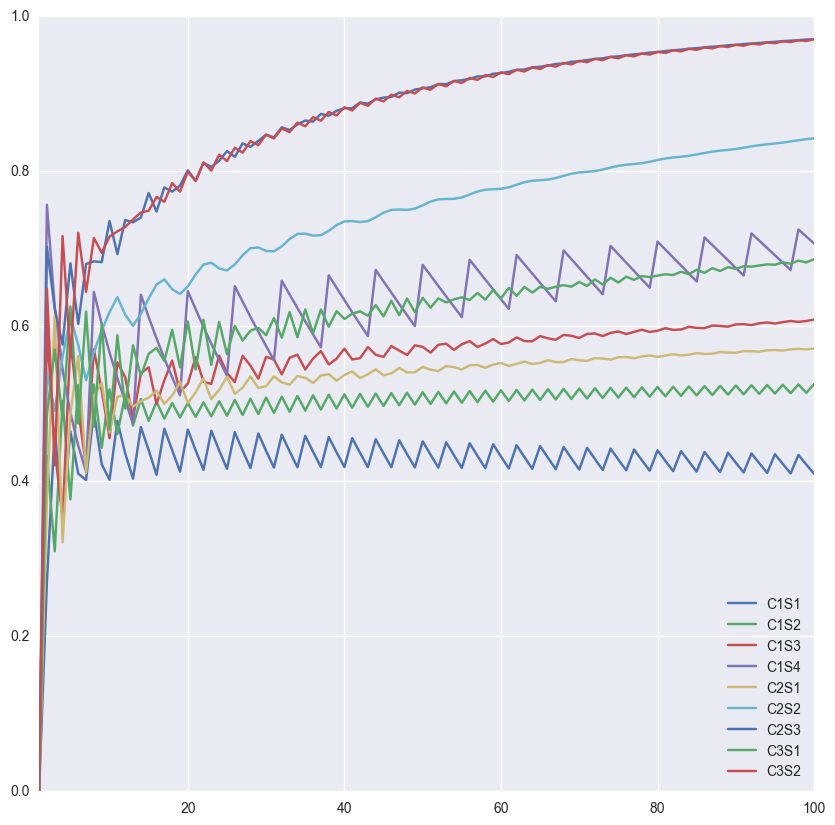

In [279]:
dfCS.plot()

In [256]:
playcombCS(2,1,4)

Win 0 times.
p = 0.059167275383491605
win Six = 0 times, win Corner = 0 times. winearn = 0 ,ap= 0.0592
sume = -50


Win 1 times.
p = 0.36815193571950333
win Six = 0 times, win Corner = 1 times. winearn = 35 ,ap= 0.0526
sume = 10
win Six = 1 times, win Corner = 0 times. winearn = 5 ,ap= 0.3156
sume = -20


Win 2 times.
p = 0.5726807888970051
win Six = 0 times, win Corner = 2 times. winearn = 70 ,ap= 0.0117
sume = 70
win Six = 1 times, win Corner = 1 times. winearn = 40 ,ap= 0.1402
sume = 40
win Six = 2 times, win Corner = 0 times. winearn = 10 ,ap= 0.4207
sume = 10




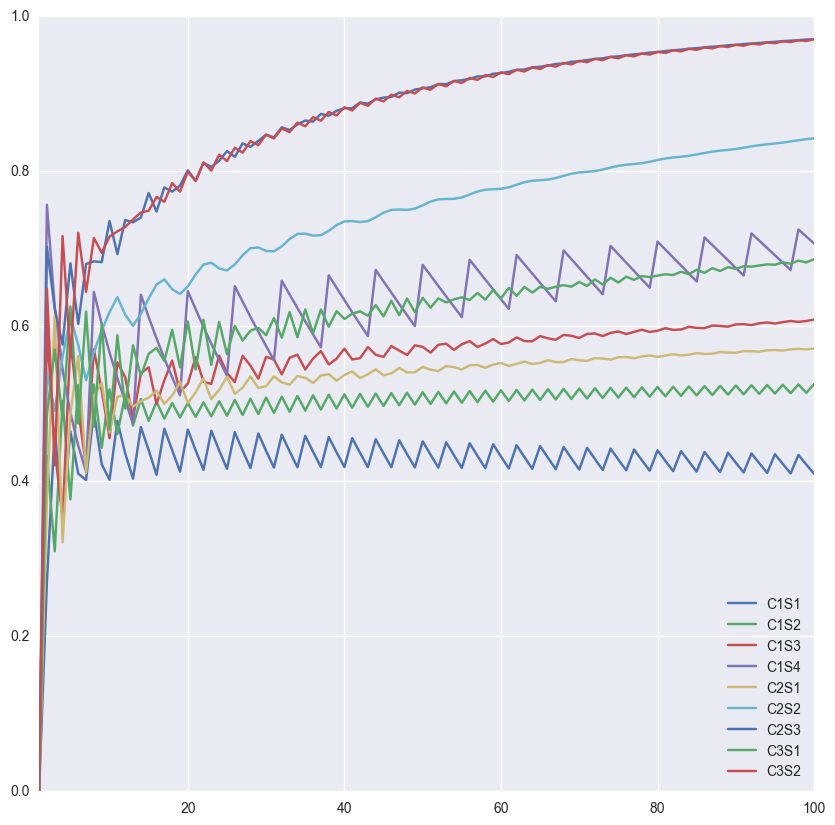

In [257]:
dfCS.plot()

In [258]:
playcombCS(2,1,1)

Win 0 times.
p = 0.5325054784514244
win Six = 0 times, win Corner = 0 times. winearn = 0 ,ap= 0.5325
sume = -20


Win 1 times.
p = 0.3944485025566107
win Six = 0 times, win Corner = 1 times. winearn = 35 ,ap= 0.1578
sume = 25
win Six = 1 times, win Corner = 0 times. winearn = 20 ,ap= 0.2367
sume = 10


Win 2 times.
p = 0.07304601899196494
win Six = 0 times, win Corner = 2 times. winearn = 70 ,ap= 0.0117
sume = 70
win Six = 1 times, win Corner = 1 times. winearn = 55 ,ap= 0.0351
sume = 55
win Six = 2 times, win Corner = 0 times. winearn = 40 ,ap= 0.0263
sume = 40




In [259]:
z = combinations(df.index,3)

for i in z:
    print(i)

('CornerBet', 'DozenBet', 'RedBlack')
('CornerBet', 'DozenBet', 'SixlineBet')
('CornerBet', 'DozenBet', 'SplitBet')
('CornerBet', 'DozenBet', 'StraightBet')
('CornerBet', 'DozenBet', 'StreetBet')
('CornerBet', 'RedBlack', 'SixlineBet')
('CornerBet', 'RedBlack', 'SplitBet')
('CornerBet', 'RedBlack', 'StraightBet')
('CornerBet', 'RedBlack', 'StreetBet')
('CornerBet', 'SixlineBet', 'SplitBet')
('CornerBet', 'SixlineBet', 'StraightBet')
('CornerBet', 'SixlineBet', 'StreetBet')
('CornerBet', 'SplitBet', 'StraightBet')
('CornerBet', 'SplitBet', 'StreetBet')
('CornerBet', 'StraightBet', 'StreetBet')
('DozenBet', 'RedBlack', 'SixlineBet')
('DozenBet', 'RedBlack', 'SplitBet')
('DozenBet', 'RedBlack', 'StraightBet')
('DozenBet', 'RedBlack', 'StreetBet')
('DozenBet', 'SixlineBet', 'SplitBet')
('DozenBet', 'SixlineBet', 'StraightBet')
('DozenBet', 'SixlineBet', 'StreetBet')
('DozenBet', 'SplitBet', 'StraightBet')
('DozenBet', 'SplitBet', 'StreetBet')
('DozenBet', 'StraightBet', 'StreetBet')
('RedB